# Reading MOD09 granules

In [1]:
%matplotlib widget
import staremaster
import contextily

In [2]:
from pyhdf.SD import SD
import numpy
import pystare
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import geopandas

## MOD09

In [3]:
file_path = '../tests/data/MOD09.A2002299.0710.006.2015151173939.hdf'
file_path = '/home/griessbaum/Dropbox/UCSB/spires/colocation/MOD09.A2020032.1940.006.2020034015024.hdf'
granule = staremaster.products.MOD09(file_path)

In [4]:
granule.load()

In [6]:
granule.make_sids(n_workers=4)

In [7]:
granule.sids['1km'].flatten()[-1]

3377442121606107563

In [8]:
granule.read_gring()
granule.read_latlon()

In [9]:
pystare.spatial_resolution(granule.sids['500m'])

array([[12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       ...,
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12]])

In [10]:
granule.create_sidecar(n_workers=4)

In [11]:
sids = staremaster.conversions.latlon2stare(granule.lats['1km'], 
                                            granule.lons['1km'], 
                                            n_workers=4)

# Interpolation Plots

In [5]:
granule.get_500m_latlon()

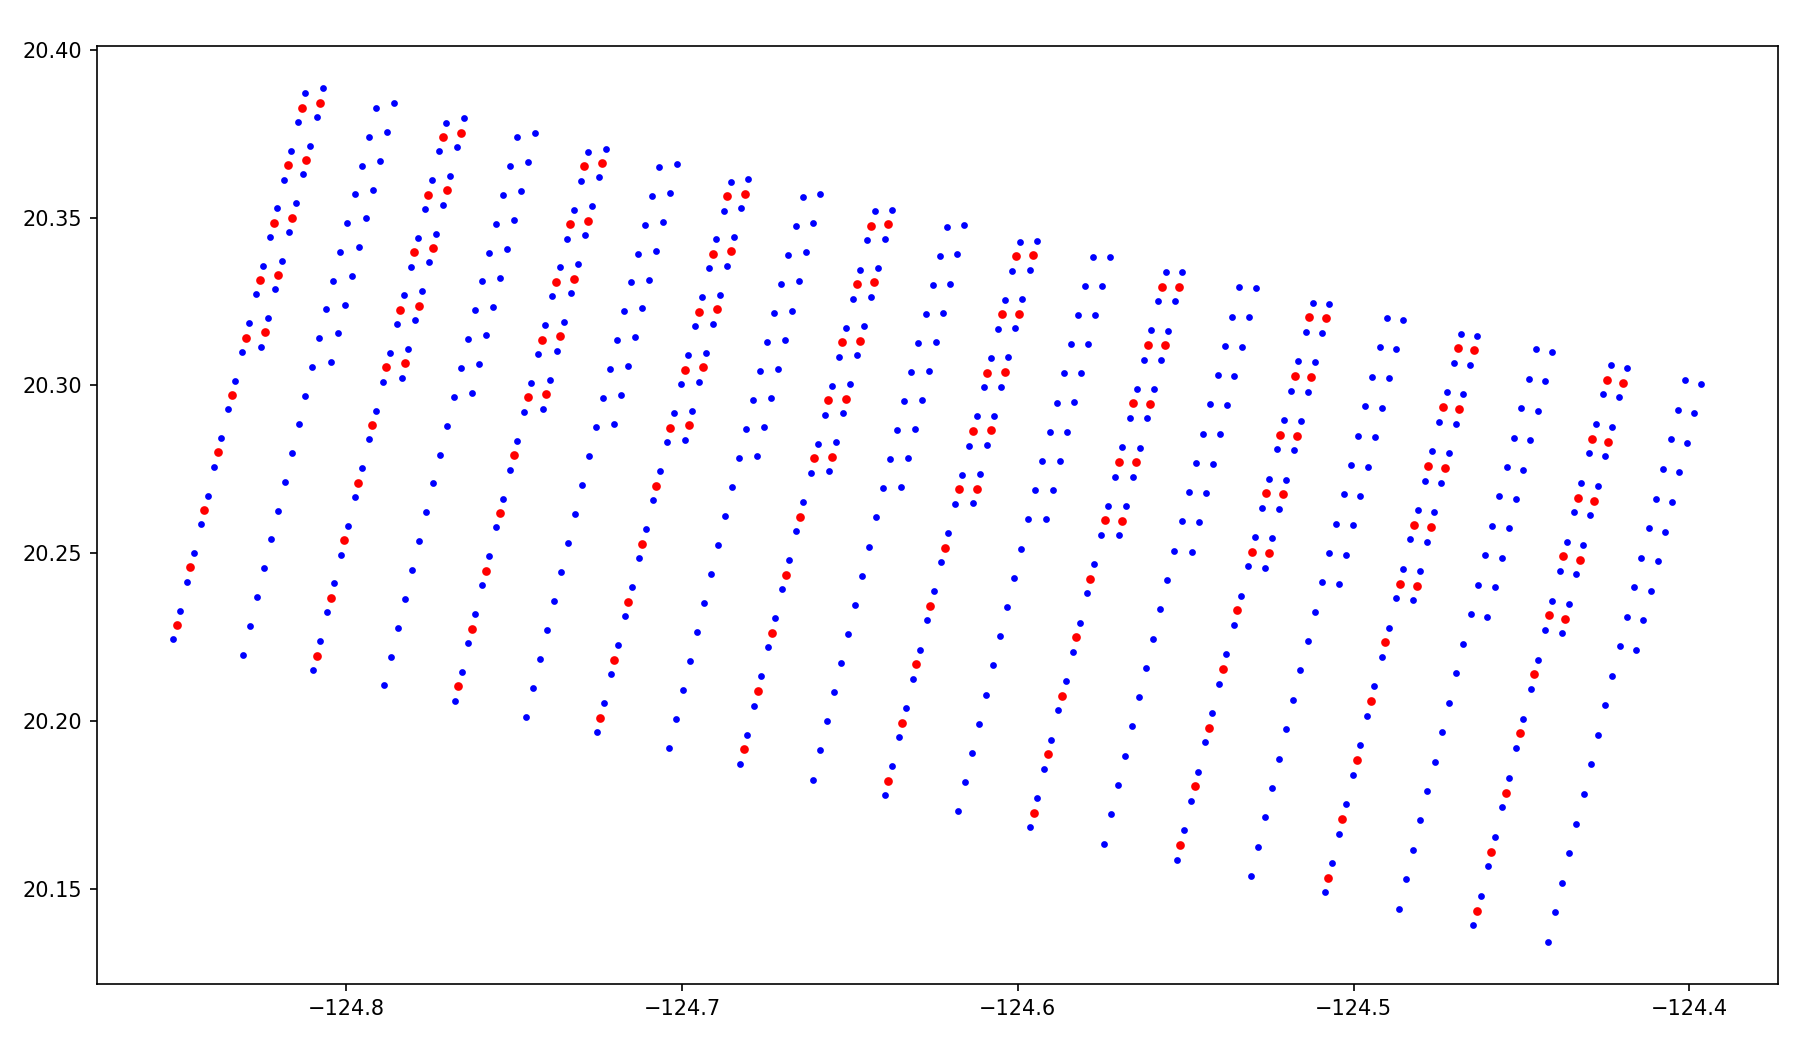

In [51]:
fig = plt.figure(figsize=(12, 7), dpi=150)
ax = fig.add_subplot()
df = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['1km'][-15:, -10:].flatten(), 
                                                              granule.lats['1km'][-15:, -10:].flatten()))

df2 = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['500m'][-30:, -20:].flatten(), 
                                                               granule.lats['500m'][-30:, -20:].flatten()))

df.plot(ax=ax, color='red', markersize=10)
df2.plot(ax=ax,markersize=5, color='blue')
#contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik, crs=4326)

fig.tight_layout()

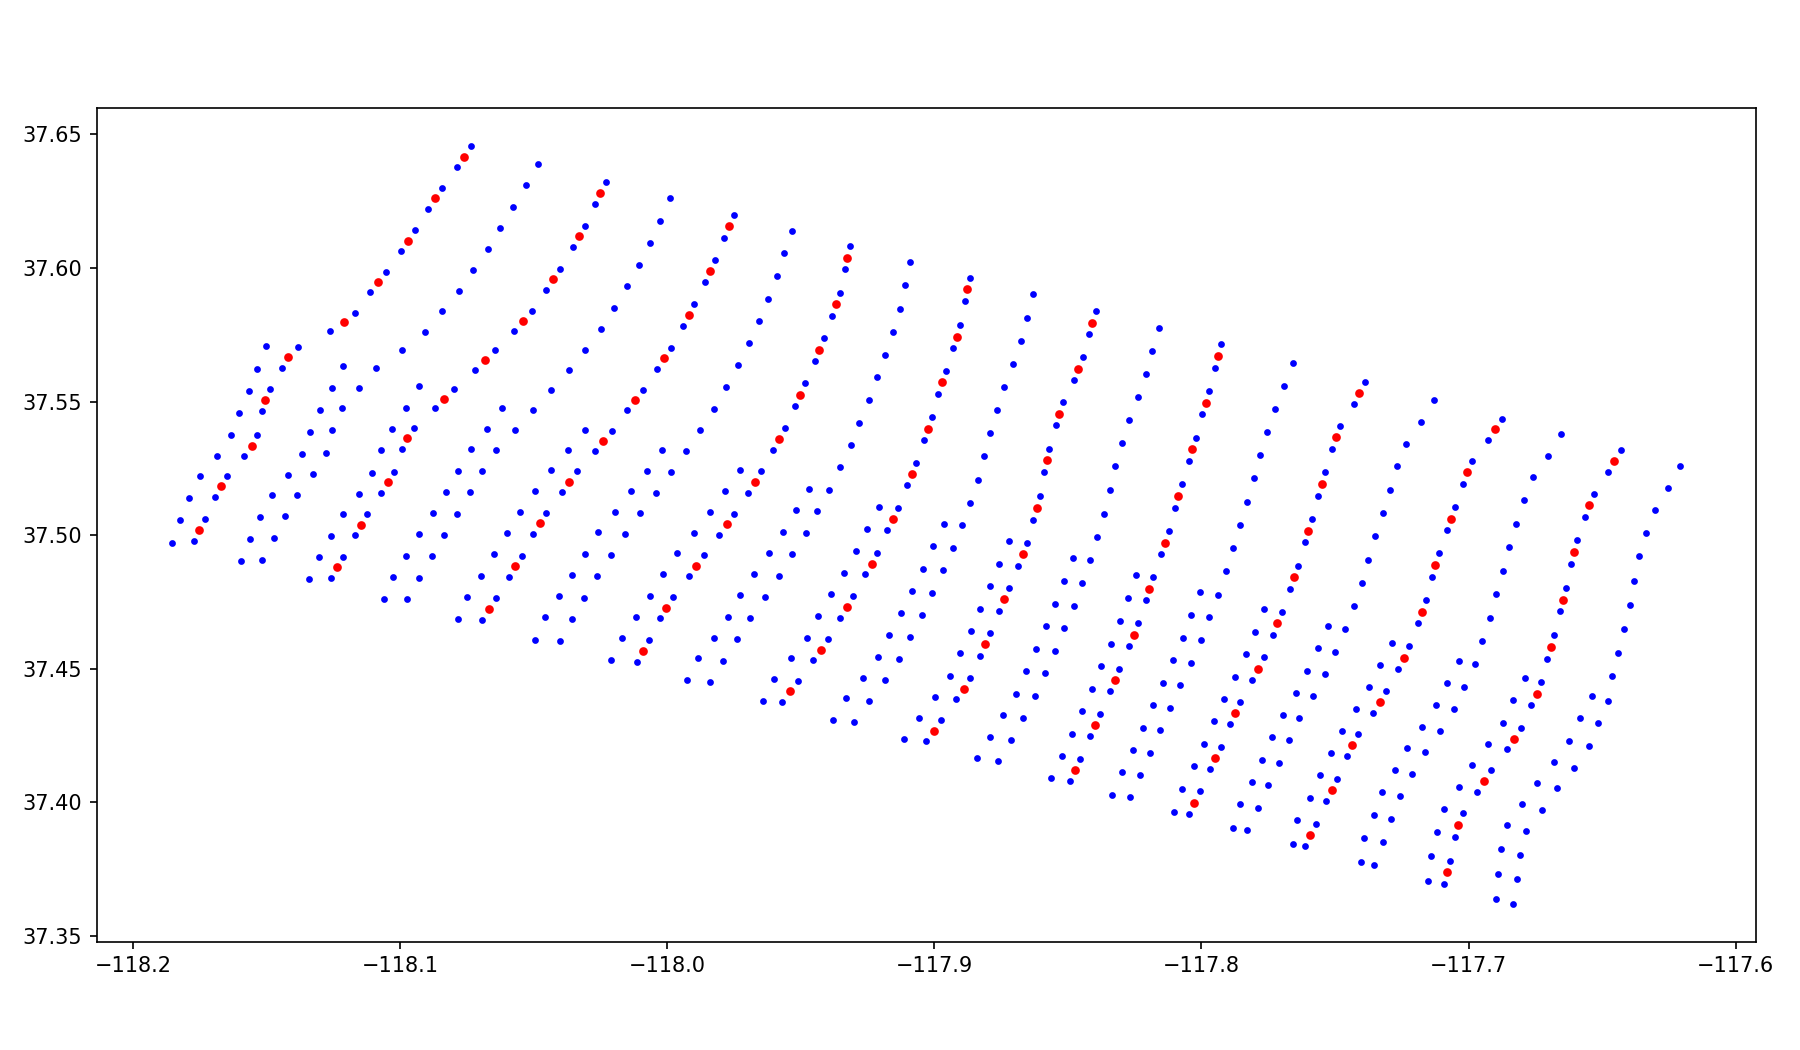

In [52]:
fig = plt.figure(figsize=(12, 7), dpi=150)
ax = fig.add_subplot()

df = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['1km'][0:10, -10:].flatten(), 
                                                              granule.lats['1km'][0:10, -10:].flatten()))

df2 = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['500m'][0:30, -20:].flatten(), 
                                                               granule.lats['500m'][0:30, -20:].flatten()))

df.plot(ax=ax, color='red', markersize=10)
df2.plot(ax=ax,markersize=5, color='blue')
fig.tight_layout()

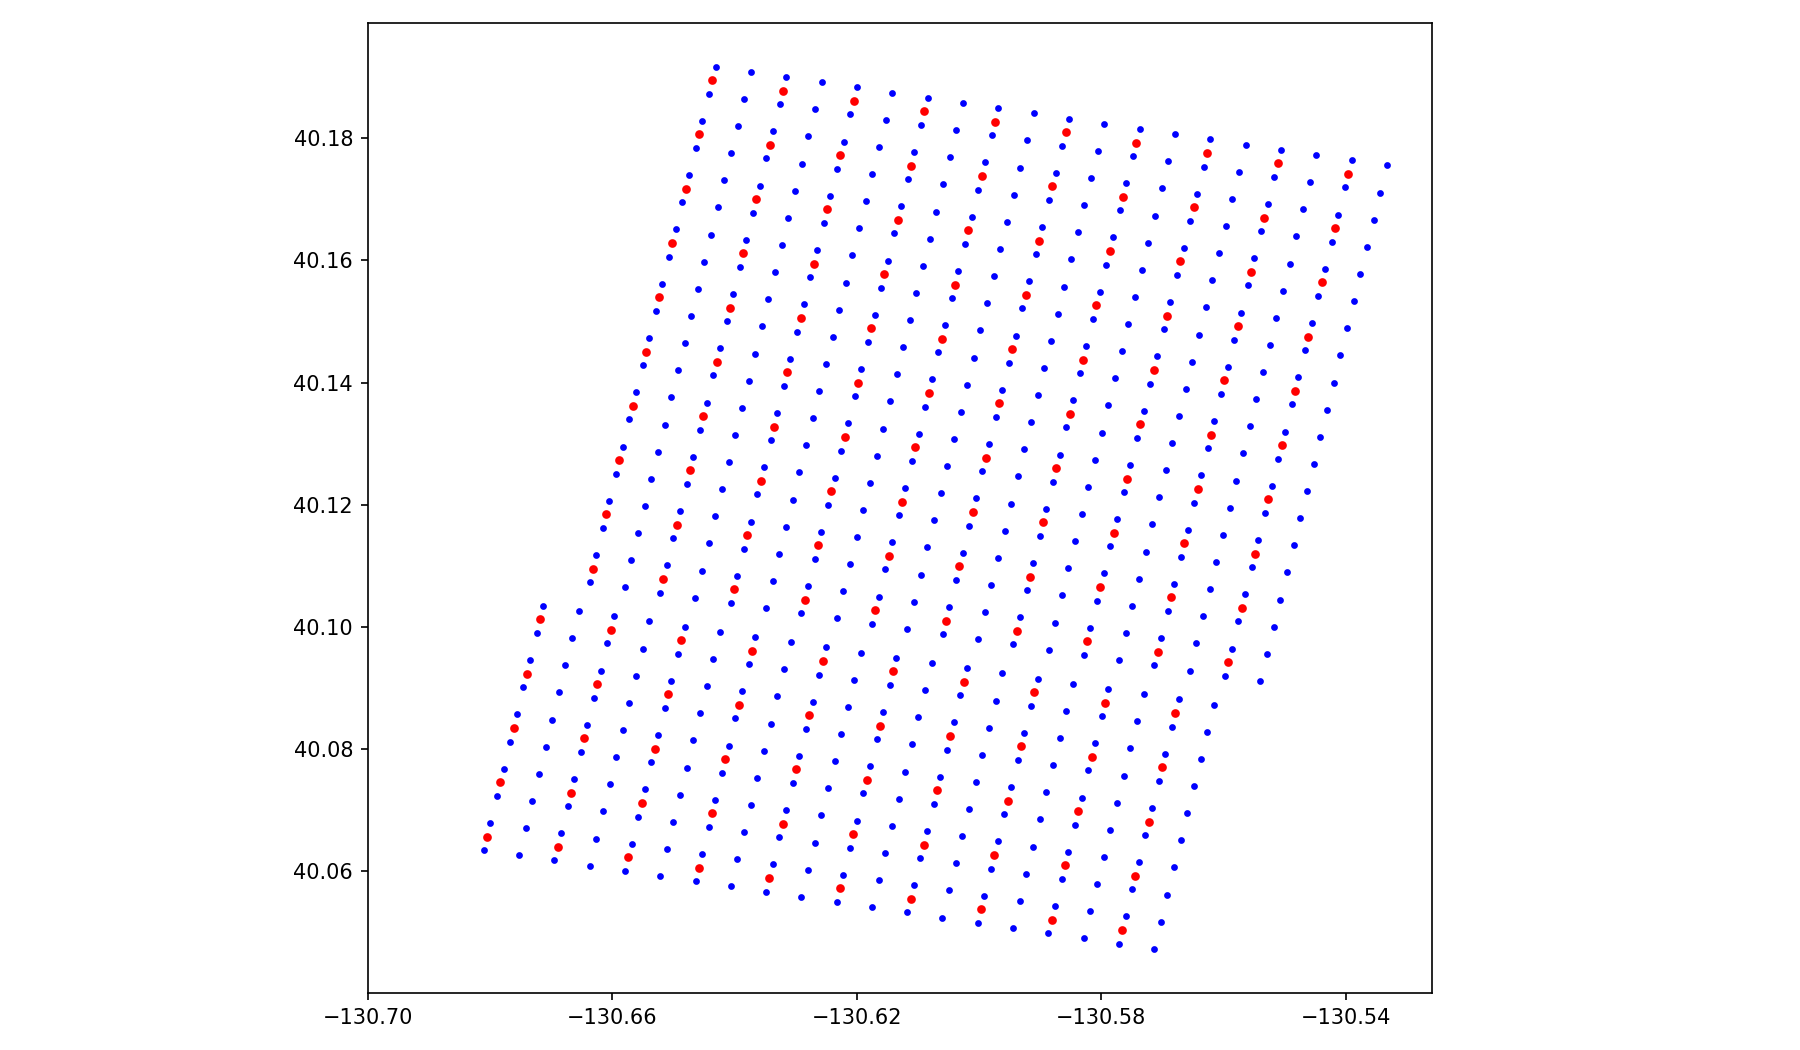

In [53]:
fig = plt.figure(figsize=(12, 7), dpi=150)
ax = fig.add_subplot()

df = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['1km'][0:15, 670:680].flatten(), 
                                                              granule.lats['1km'][0:15, 670:680].flatten()))

df2 = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['500m'][0:30, 1340:1360].flatten(), 
                                                               granule.lats['500m'][0:30, 1340:1360].flatten()))



df.plot(ax=ax, color='red', markersize=10)
df2.plot(ax=ax,markersize=5, color='blue')

ax.set_xticks(ax.get_xticks()[::2])
fig.tight_layout()

## Test with starepandas

In [1]:
import starepandas
import netCDF4
import numpy
import pandas

In [2]:
file_path = '../tests/data/MOD09.A2002299.0710.006.2015151173939.hdf'
sdf = starepandas.read_granule(file_path, sidecar=True)

In [4]:
sdf.spatial_resolution()

array([31, 31, 31, ..., 12, 12, 12], dtype=object)

In [9]:
sdf.to_stare_resolution(11)

,sids,1km Atmospheric Optical Depth Band 1,1km Atmospheric Optical Depth Band 3,1km Atmospheric Optical Depth Band 8,1km Atmospheric Optical Depth Model,1km water_vapor,1km Atmospheric Optical Depth Band QA,1km Atmospheric Optical Depth Band CM,1km Surface Reflectance Band 1,1km Surface Reflectance Band 2,...,1km Surface Reflectance Band 13,1km Surface Reflectance Band 14,1km Surface Reflectance Band 15,1km Surface Reflectance Band 16,1km Surface Reflectance Band 26,1km Reflectance Band Quality,1km b8-15 Reflectance Band Quality,1km b16 Reflectance Band Quality,1km Reflectance Data State QA,1km Band 3 Path Radiance
0,-21,NaN,NaN,NaN,NaN,2.93,16386,21,NaN,NaN,...,-0.01,-0.01,-0.01,-0.01,0.0,787410671,3722304989,208,56,0.0
1,-21,NaN,NaN,NaN,NaN,2.93,16386,21,NaN,NaN,...,-0.01,-0.01,-0.01,-0.01,0.0,787410671,3722304989,208,56,0.0
2,-21,NaN,NaN,NaN,NaN,2.93,16386,21,NaN,NaN,...,-0.01,-0.01,-0.01,-0.01,0.0,787410671,3722304989,208,56,0.0
3,-21,NaN,NaN,NaN,NaN,2.93,16386,21,NaN,NaN,...,-0.01,-0.01,-0.01,-0.01,0.0,787410671,3722304989,208,56,0.0
4,-21,NaN,NaN,NaN,NaN,2.93,16386,21,NaN,NaN,...,-0.01,-0.01,-0.01,-0.01,0.0,787410671,3722304989,208,56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748615,3520425476210836779,NaN,NaN,NaN,NaN,0.97,16386,21,NaN,NaN,...,-0.01,-0.01,-0.01,-0.01,0.0,1002159035,3722304989,208,56,0.0
2748616,3520427033364044971,NaN,NaN,NaN,NaN,0.97,16386,21,NaN,NaN,...,-0.01,-0.01,-0.01,-0.01,0.0,1002159035,3722304989,208,56,0.0
2748617,3520426917205266315,NaN,NaN,NaN,NaN,0.97,16386,21,NaN,NaN,...,-0.01,-0.01,-0.01,-0.01,0.0,1002159035,3722304989,208,56,0.0
2748618,3520522723574710187,NaN,NaN,NaN,NaN,0.97,16386,21,NaN,NaN,...,-0.01,-0.01,-0.01,-0.01,0.0,1002159035,3722304989,208,56,0.0


In [17]:
s['sids'] = s['sids'].astype(numpy.int64)

/home/griessbaum/.virtualenvs/staremaster_py/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [3]:
starepandas.STAREDataFrame(sids=[3520425476210836992, 3520426917205266432, 3520522815746171403]).spatial_resolution()

array([ 0,  0, 11])

In [25]:
ds =netCDF4.Dataset('../tests/data/MOD09.A2002299.0710.006.2015151173939_stare.nc')

In [27]:
sids = ds['STARE_index_1km'][:, :]
sids

masked_array(
  data=[[--, --, --, ..., 3311031317780292908, 3311031377246612044,
         3311031153792310316],
        [--, --, --, ..., 3311031063151311500, 3311031256519239020,
         3311031242577335372],
        [--, --, --, ..., 3311031079302192428, 3311031251813509420,
         3311031185903903788],
        ...,
        [--, --, --, ..., 3520523832472108108, 3520523863776842348,
         3520523841722790540],
        [--, --, --, ..., 3520523808312187020, 3520522731892836108,
         3520522805301576524],
        [--, --, --, ..., 3520426917205266316, 3520522723574710188,
         3520522815746171596]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=184467440

In [35]:
#sids = sids.astype(numpy.int64)
sids.flatten()

masked_array(data=[--, --, --, ..., 3520426917205266316,
                   3520522723574710188, 3520522815746171596],
             mask=[ True,  True,  True, ..., False, False, False],
       fill_value=18446744073709551615,
            dtype=uint64)

In [34]:
pandas.array(sids.flatten(), dtype='UInt64')

<IntegerArray>
[18446744073709551615, 18446744073709551615, 18446744073709551615,
 18446744073709551615, 18446744073709551615, 18446744073709551615,
 18446744073709551615, 18446744073709551615, 18446744073709551615,
 18446744073709551615,
 ...
  3521544298562029900,  3521542587346850892,  3521542630509968524,
  3520425380908115436,  3520425312089826540,  3520425476210836780,
  3520427033364044972,  3520426917205266316,  3520522723574710188,
  3520522815746171596]
Length: 2748620, dtype: UInt64

In [30]:
pandas.Series(ds['STARE_index_1km'][:, :].flatten(), dtype='UInt64')

0                         <NA>
1                         <NA>
2                         <NA>
3                         <NA>
4                         <NA>
                  ...         
2748615    3520425476210836992
2748616    3520427033364044800
2748617    3520426917205266432
2748618    3520522723574710272
2748619    3520522815746171392
Length: 2748620, dtype: UInt64